In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series,DataFrame
import cv2
import os
print (os.getcwd())
k = 0
n = 500
#s = "run-1_bp-chest_vp-pa_cr.png"
X_data=[]
path_label=[]
data = pd.read_csv("cov.csv")
for i in range(0,2464):
    b = './'+data.loc[i][0]+'/'+data.loc[i][1]+'/mod-rx/'
    print(i)
    try:
         for filename in os.listdir(b): 
                if filename.endswith('png'):#listdir的参数是文件夹的路径
                    #print (filename) #此时的filename是文件夹中文件的名称
                    fil = data.loc[i][0]+'_'+data.loc[i][1]+'_run-1_bp-chest_vp-pa_cr.png'
                    c = b+fil
                    try:
                        d = cv2.imread(c,0)
                        d = cv2.resize(d,(n,n))
                        #if s == fil:
                        #    print("重复")
                        #else:
                        X_data.append(d)
                        if(data.loc[i][2]==1):
                            k = k+1
                        path_label.append(data.loc[i][2])   
                        print(c)
                    except:
                        print("无此图片")
                    #print(d.shape)          
    except:
        print("异常")
print(k)

F:\工作记录\脑梗死\data


FileNotFoundError: [Errno 2] No such file or directory: 'cov.csv'

In [2]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, path_label, test_size=0.2)
Xtrain = np.array(X_train)
Xtext = np.array(X_test)
Ytrain = np.array(y_train)
Ytext = np.array(y_test)
print(Xtrain.shape)
print(Xtext.shape)

(821, 500, 500)
(206, 500, 500)


In [6]:
import os
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn.metrics import classification_report
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = ConfigProto()
config.gpu_options.allow_growth = True
sess = InteractiveSession(config=config)
print(tf.__version__)
Xtrain = Xtrain.reshape(821, n, n, 1)
#Xtrain = Xtrain / 255.0
Xtext = Xtext.reshape(206, n, n, 1)
#Xtext = Xtext / 255.0
#X_test1 = X_test1.reshape(628, 2170, 2036, 1)
#X_test1 = X_test1 / 255.0
#mnist = tf.keras.datasets.fashion_mnist
#(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images.reshape(60000, 28, 28, 1)
#training_images=training_images / 255.0
#test_images = test_images.reshape(10000, 28, 28, 1)
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(n, n, 1)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  #tf.keras.layers.BatchNormalization(),
  #tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(Xtrain, Ytrain, batch_size=50, epochs=100,validation_data=(Xtext, Ytext))
test_loss = model.evaluate(Xtext, Ytext)

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


1.15.2
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 498, 498, 64)      640       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 496, 496, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 248, 248, 64)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 246, 246, 128)     73856     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 244, 244, 128)     147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 122, 122, 128)     0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 120, 120, 2

              precision    recall  f1-score   support

           0       0.65      1.00      0.78       133
           1       0.00      0.00      0.00        73

    accuracy                           0.65       206
   macro avg       0.32      0.50      0.39       206
weighted avg       0.42      0.65      0.51       206

0.38062078
0.37791476
0.37655225
0.38296786
0.38003793
0.38301593
0.38290474
0.38449922
0.38187787
0.38535655
0.3814476
0.37957418
0.38346514
0.3808863
0.37680775
0.37886867
0.37835166
0.37906924
0.38216594
0.3770157
0.3844948
0.37637928
0.38259345
0.38096163
0.38487434
0.37693718
0.37782764
0.38182425
0.38327575
0.3847402
0.38076296
0.37764692
0.37861723
0.3762409
0.381371
0.37670103
0.37947932
0.38355044
0.3760183
0.38399863
0.38429913
0.38245025
0.38443577
0.38547453
0.38196653
0.37927198
0.38195807
0.3817773
0.38373628
0.37888867
0.38026607
0.38498324
0.38527083
0.38336882
0.38065943
0.38525563
0.38337696
0.3799401
0.3824725
0.37893954
0.3827068
0.37727287
0.38

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


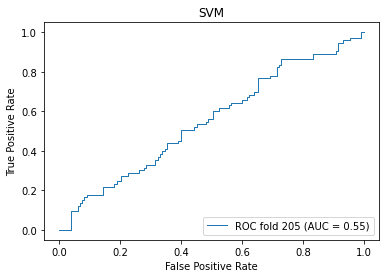

In [9]:
from sklearn import metrics 
from sklearn.metrics import roc_curve, auc  
import numpy as np  
from numpy import interp
y = model.predict(Xtext)
print (metrics.classification_report(Ytext,y[:, 1].round()))  
import random
for i in range(len(y)):
    a = random.uniform(0,0.01)
    y[i,1] = y[i,1] - a
    print(y[i,1])
mean_tpr = 0.0  
mean_fpr = np.linspace(0, 1, 100)  
all_tpr = [] 
probas_ = y 
fpr, tpr, thresholds = roc_curve(Ytext, probas_[:, 1]) 
copy = np.random.uniform(1,100,(len(Ytext),2)) 
for i in range(len(y)):
    copy[i,0] = Ytext[i]
    copy[i,1] =probas_[i,1]
print(copy)
mean_tpr += interp(mean_fpr, fpr, tpr) #对mean_tpr在mean_fpr处进行插值，通过scipy包调用interp()函数  
mean_tpr[0] = 0.0  #初始处为0  
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc)) 
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('SVM')  
plt.legend(loc="lower right")  
plt.show() 

In [10]:
import pandas as pd
name = ['True','pre']
test = pd.DataFrame(columns=name,data=copy)
test.to_csv('VGG.csv')